# <b> Text classification with movie reviews
    
The IMDB dataset comes packaged with TensorFlow. It has already been preprocessed such that the reviews (sequences of words) have been converted to sequences of integers, where each integer represents a specific word in a dictionary.

#### <b> Imports

In [34]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)


1.14.0


#### <b> Load Data

In [35]:
# The argument num_words=10000 keeps the top 10,000 most frequently occurring words in the training data. 
# The rare words are discarded to keep the size of the data manageable.
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#### <b> Explore Data

In [36]:
(train_data.shape, train_labels.shape), (test_data.shape, test_labels.shape) 

(((25000,), (25000,)), ((25000,), (25000,)))

In [37]:
# Our first review with number representation (each integer represents a word in a dictionary)
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


#### <b>  Convert the integers back to words

In [38]:
# A dictionary mapping words to an integer index
# Retrieves the dictionary mapping word indices back to words.
word_index = imdb.get_word_index()

In [39]:
# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

In [40]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [41]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [42]:
# Our review with text representation
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

#### <b>  Prepare Data

The reviews—the arrays of integers—must be converted to tensors before fed into the neural network:

1 - Convert the arrays into vectors of 0s and 1s indicating word occurrence, similar to a one-hot encoding

2 - max_length * num_reviews. We can use an embedding layer capable of handling this shape as the first layer in our network. (used here)

In [43]:
train_data.shape, test_data.shape

((25000,), (25000,))

In [44]:
# Pads sequences to the same length (standardize the length)
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)


In [45]:
len(train_data[0]), len(train_data[1])

(256, 256)

#### <b>  Build the Model

In [46]:
model = keras.Sequential()
'''
Embedding: takes the integer-encoded vocabulary and looks up 
the embedding vector for each word-index
GlobalAveragePooling1D: returns a fixed-length output vector for each example by averaging
over the sequence dimension
Dense: this fixed-length output vector is piped through a fully-connected layer with 16 hidden units
Dense: output sigmoide 0 or 1
'''
model.add(keras.layers.Embedding(10000, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['acc'])

#### <b>  Creating a Validation Model
    
    
When training, we want to check the accuracy of the model on data it hasn't seen before. Create a validation set by setting apart 10,000 examples from the original training data. (Why not use the testing set now? Our goal is to develop and tune our model using only the training data, then use the test data just once to evaluate our accuracy).

In [48]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [49]:
# Training samples
partial_x_train.shape, partial_y_train.shape

((15000, 256), (15000,))

In [50]:
# Test samples
test_data.shape, test_labels.shape

((25000, 256), (25000,))

In [51]:
# Validation samples
x_val.shape, y_val.shape

((10000, 256), (10000,))

#### <b>  Train the Model

In [52]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=40,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                   verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 53us/sample - loss: 0.6925 - acc: 0.5560 - val_loss: 0.6913 - val_acc: 0.6021
Epoch 2/40
15000/15000 [==============================] - 1s 36us/sample - loss: 0.6888 - acc: 0.6747 - val_loss: 0.6857 - val_acc: 0.7016
Epoch 3/40
15000/15000 [==============================] - 1s 35us/sample - loss: 0.6791 - acc: 0.7415 - val_loss: 0.6726 - val_acc: 0.7523
Epoch 4/40
15000/15000 [==============================] - 1s 34us/sample - loss: 0.6605 - acc: 0.7604 - val_loss: 0.6506 - val_acc: 0.7487
Epoch 5/40
15000/15000 [==============================] - 1s 34us/sample - loss: 0.6315 - acc: 0.7843 - val_loss: 0.6194 - val_acc: 0.7726
Epoch 6/40
15000/15000 [==============================] - 1s 34us/sample - loss: 0.5932 - acc: 0.8021 - val_loss: 0.5814 - val_acc: 0.7946
Epoch 7/40
15000/15000 [==============================] - 1s 35us/sample - loss: 0.5478 - acc: 0.8200 - val_loss: 0.

In [53]:
results = model.evaluate(test_data, test_labels)

print(results)


25000/25000 [==============================] - 0s 17us/sample - loss: 0.3264 - acc: 0.8734
[0.326355365896225, 0.87344]


In [54]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

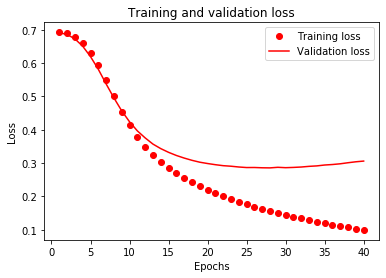

In [55]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'ro', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

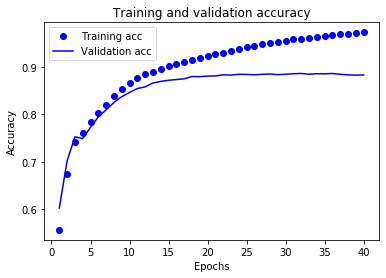

In [56]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In this plot, the dots represent the training loss and accuracy, and the solid lines are the validation loss and accuracy.

Notice the training loss decreases with each epoch and the training accuracy increases with each epoch. This is expected when using a gradient descent optimization—it should minimize the desired quantity on every iteration.

This isn't the case for the validation loss and accuracy—they seem to peak after about twenty epochs. This is an example of overfitting: the model performs better on the training data than it does on data it has never seen before. After this point, the model over-optimizes and learns representations specific to the training data that do not generalize to test data.

For this particular case, we could prevent overfitting by simply stopping the training after twenty or so epochs. Later, you'll see how to do this automatically with a callback.

In [83]:
'''
The model is overfitting so we use EarlyStopping to Stop 
training when a monitored quantity has stopped improving.
verbose = shows the number of epoch when improve stops
'''
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [84]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=100,
                   batch_size=200,
                   validation_data=(x_val, y_val),
                   verbose=1, callbacks=[es])

Train on 15000 samples, validate on 10000 samples
Epoch 1/100
15000/15000 [==============================] - 1s 46us/sample - loss: 0.0073 - acc: 0.9996 - val_loss: 0.6601 - val_acc: 0.8623
Epoch 2/100
15000/15000 [==============================] - 1s 44us/sample - loss: 0.0066 - acc: 0.9995 - val_loss: 0.6703 - val_acc: 0.8625
Epoch 3/100
15000/15000 [==============================] - 1s 43us/sample - loss: 0.0059 - acc: 0.9995 - val_loss: 0.6813 - val_acc: 0.8624
Epoch 4/100
15000/15000 [==============================] - 1s 43us/sample - loss: 0.0053 - acc: 0.9997 - val_loss: 0.6974 - val_acc: 0.8624
Epoch 5/100
15000/15000 [==============================] - 1s 43us/sample - loss: 0.0049 - acc: 0.9998 - val_loss: 0.7056 - val_acc: 0.8616
Epoch 6/100
15000/15000 [==============================] - 1s 47us/sample - loss: 0.0044 - acc: 0.9998 - val_loss: 0.7132 - val_acc: 0.8623
Epoch 7/100
15000/15000 [==============================] - 1s 44us/sample - loss: 0.0041 - acc: 0.9999 - val_l

In [85]:
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 0s 17us/sample - loss: 0.8155 - acc: 0.8475
[0.8155274848437309, 0.84752]


In [86]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

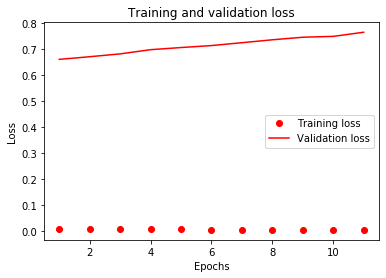

In [87]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'ro', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

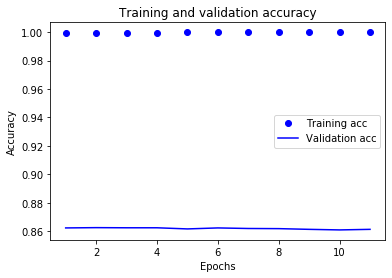

In [88]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()